In [1]:
import torch
print(torch.__version__)

2.4.1+cu121


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import cv2
import torch

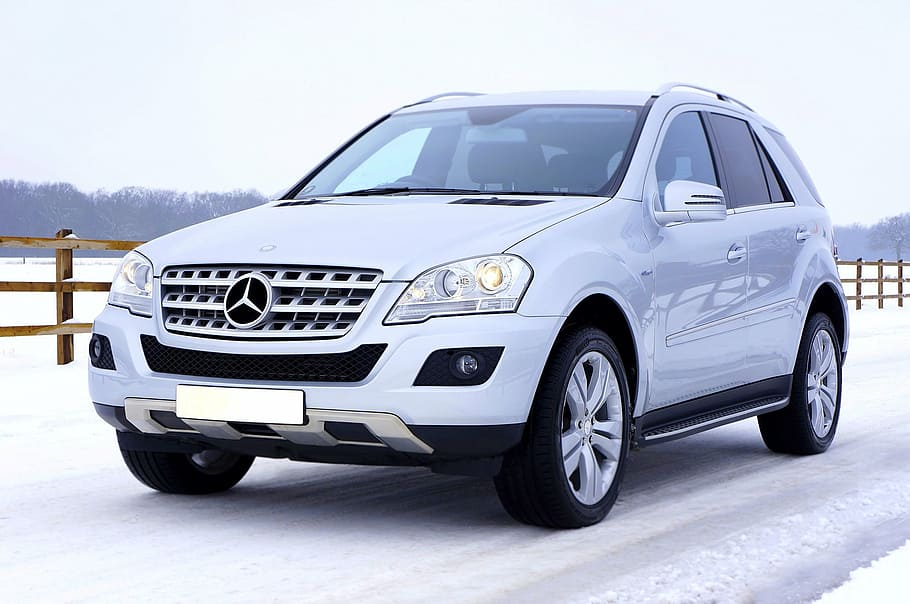

In [ ]:
import cv2
import torch
from google.colab.patches import cv2_imshow
import numpy as np
import base64


# Function to load image from data URL or path
def load_image(image_source):
    # Check if the image source is a Data URL
    if image_source.startswith('data:image'):
        # Process Data URL
        header, encoded = image_source.split(',', 1)
        data = base64.b64decode(encoded)
        nparr = np.frombuffer(data, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    else:
        # Process file path
        img = cv2.imread(image_source)
        if img is None:
            raise ValueError(f"Could not read image from path: {image_source}")
    return img

# Example usage with a custom image path or data URL
image_source = '/content/drive/MyDrive/mercedes-car-transport-auto.jpg'  # Replace with your image path or a Data URL

# Load the image
frame = load_image(image_source)

# Display the image before object detection
cv2_imshow(frame)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 164.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.4s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-10-14 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 133MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


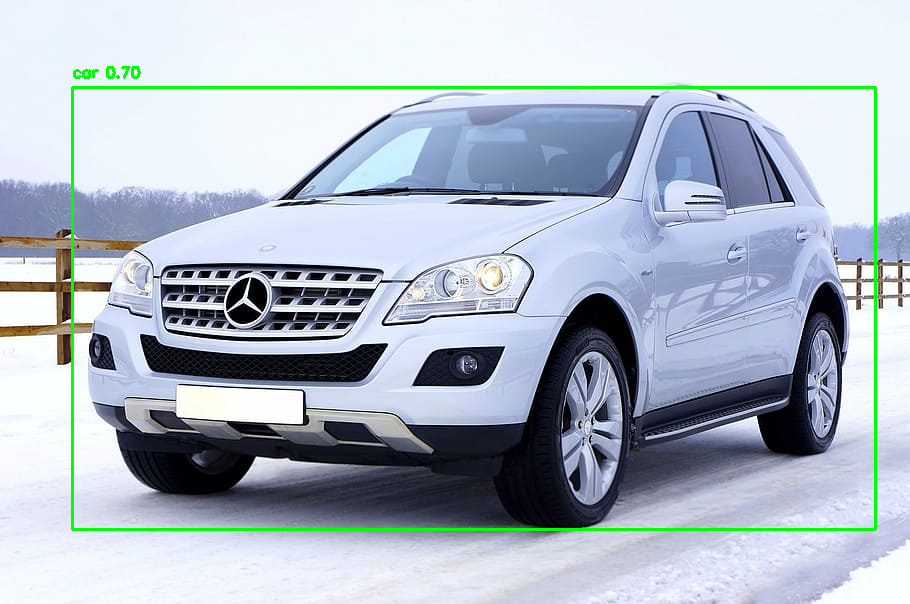

In [ ]:

import torch

# Load YOLOv5 model choose the small yolo5 from directory of ultralytics from pytorch module
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Process the captured image for object detection
results = model(frame)

# Draw bounding boxes
for result in results.xyxy[0]:
    x1, y1, x2, y2, conf, cls = result
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(frame, f"{model.names[int(cls)]} {conf:.2f}", (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the resulting frame
cv2_imshow(frame)
